In [56]:

import pandas as pd
import plotly.express as px
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

RANDOM_SEED = 13
%matplotlib inline

In [57]:
train_df = pd.read_csv('train.csv').set_index('PassengerId')
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Кол-во отсутствующих значений по признакам


In [58]:
train_df.describe()


,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [59]:
train_df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [87]:
bad_cols = ['Name','Ticket','Cabin'] # колонки с уникальными данными(номера кабин, имена и номер билета)
for c in train_df.drop(bad_cols,axis=1).columns:
    fig = px.histogram(train_df[c],x=c,width=700,height=500)
    fig.show()

In [92]:
data = train_df.drop(bad_cols, axis=1)
data = data.dropna() # отбрасываем 179 объектов с пропущенными значениями признаков
train_data, test_data = train_test_split(data,test_size=0.3,random_state=RANDOM_SEED)

X = data.drop('Survived',axis=1)
y = data['Survived']

X_train = train_data.drop('Survived',axis=1)
y_train = train_data['Survived']

X_test = test_data.drop('Survived',axis=1)
y_test = test_data['Survived']

X = pd.get_dummies(X)
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
867,2,27.0,1,0,13.8583,1,0,1,0,0
776,3,18.0,0,0,7.7500,0,1,0,0,1
782,1,17.0,1,0,57.0000,1,0,0,0,1
9,3,27.0,0,2,11.1333,1,0,0,0,1
225,1,38.0,1,0,90.0000,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
194,2,3.0,1,1,26.0000,0,1,0,0,1
671,2,40.0,1,1,39.0000,1,0,0,0,1
98,1,23.0,0,1,63.3583,0,1,1,0,0


In [115]:
clf = tree.DecisionTreeClassifier(max_depth=3,random_state=RANDOM_SEED)
scores = cross_val_score(clf,X_train,y_train,cv=10)
clf.fit(X_train, y_train)
print(f"Точность классификации:\t\t\t\t\t\t{accuracy_score(clf.predict(X_test),y_test):.3f}\n\
Точность классификации по кросс-валидации:\t{scores.mean():.3f}")


Точность классификации:						0.818
Точность классификации по кросс-валидации:	0.761


## Построим и визуализируем дерево решений.

[Text(0.5, 0.875, 'Sex_male <= 0.5\ngini = 0.483\nsamples = 498\nvalue = [295, 203]'),
 Text(0.25, 0.625, 'Pclass <= 2.5\ngini = 0.378\nsamples = 182\nvalue = [46, 136]'),
 Text(0.125, 0.375, 'Age <= 3.0\ngini = 0.122\nsamples = 107\nvalue = [7, 100]'),
 Text(0.0625, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1875, 0.125, 'gini = 0.108\nsamples = 105\nvalue = [6, 99]'),
 Text(0.375, 0.375, 'Fare <= 23.087\ngini = 0.499\nsamples = 75\nvalue = [39, 36]'),
 Text(0.3125, 0.125, 'gini = 0.491\nsamples = 60\nvalue = [26, 34]'),
 Text(0.4375, 0.125, 'gini = 0.231\nsamples = 15\nvalue = [13, 2]'),
 Text(0.75, 0.625, 'Pclass <= 1.5\ngini = 0.334\nsamples = 316\nvalue = [249, 67]'),
 Text(0.625, 0.375, 'Age <= 53.0\ngini = 0.488\nsamples = 76\nvalue = [44, 32]'),
 Text(0.5625, 0.125, 'gini = 0.499\nsamples = 62\nvalue = [32, 30]'),
 Text(0.6875, 0.125, 'gini = 0.245\nsamples = 14\nvalue = [12, 2]'),
 Text(0.875, 0.375, 'Age <= 9.5\ngini = 0.249\nsamples = 240\nvalue = [205, 35]')

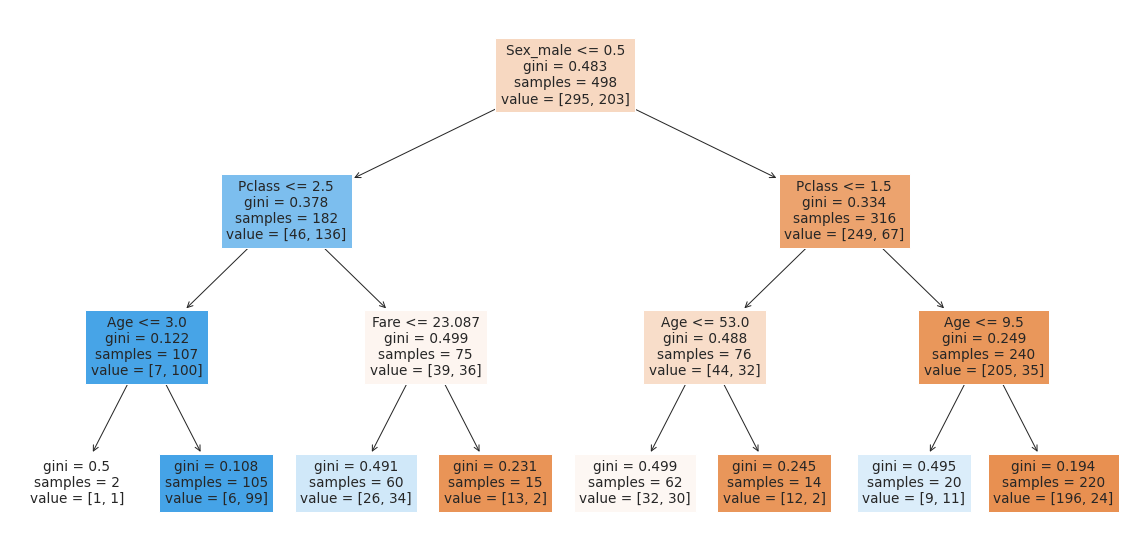

In [116]:
fig = plt.figure(figsize=(20,10))
tree.plot_tree(clf,feature_names=X_train.columns,max_depth=3,filled=True,rounded=False)
# fig.savefig('output.png')

## Запишем найденные правила в виде логических утверждений.

## Построим график зависимости точности от максимального кол-ва листьев

In [97]:
test_scores,train_scores = [],[]
for max_leaf_nodes in np.arange(2,13):
    model = tree.DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes,random_state=RANDOM_SEED)#.fit(X_train,y_train)
    cv = cross_validate(model,X_train,y_train,cv=10,return_train_score=True)
    score_train = cv['train_score'].mean()
    score_test = cv['test_score'].mean()
    test_scores.append(score_test)
    train_scores.append(score_train)



In [98]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x = np.arange(2,64),y = test_scores,name='test'))
fig.add_trace(go.Scatter(x = np.arange(2,64),y = train_scores,name = 'train'))

fig.update_layout(
    xaxis_title='Макисмальное число листьев',
    yaxis_title='Точность',
    width=700, height=500
)


## Построим график зависимости точности от максимальной глубине

In [101]:
test_scores,train_scores = [],[]
for max_depth in np.arange(2,10):
    model = tree.DecisionTreeClassifier(max_depth=max_depth,random_state=RANDOM_SEED)#.fit(X_train,y_train)
    cv = cross_validate(model,X_train,y_train,cv=10,return_train_score=True)
    score_train = cv['train_score'].mean()
    score_test = cv['test_score'].mean()
    test_scores.append(score_test)
    train_scores.append(score_train)



In [102]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x = np.arange(2,20),y = test_scores,name='test'))
fig.add_trace(go.Scatter(x = np.arange(2,20),y = train_scores,name = 'train'))

fig.update_layout(
    xaxis_title='Макисмальная глубина',
    yaxis_title='Точность',
    width=700, height=500
)


## Кросс Валидация с критерием разбиения "entropy"

In [103]:
RS = 3
params = {
    'max_depth':np.arange(1,15,1),
    'criterion':['entropy'],
    'splitter':['best','random'],
    'min_samples_split':[2,4,6,8],
    'min_samples_leaf': np.arange(1,5,1)
}
tr = tree.DecisionTreeClassifier(random_state=RS)
clf = GridSearchCV(tr,params)
clf.fit(X,y)
best_model = clf.best_estimator_
scores = cross_val_score(best_model,X,y,cv=10)
print(scores.mean())

0.8007042253521128


## Кросс Валидация с критерием разбиения 'gini'

In [104]:
params = {
    'max_depth':np.arange(1,15,1),
    'criterion':['gini'],
    'splitter':['best','random'],
    'min_samples_split':[2,4,6,8],
    'min_samples_leaf': np.arange(1,5,1)
    # 'max_leaf_nodes': np.arange(2,10,2)    
}
tr = tree.DecisionTreeClassifier(random_state=RS)
clf = GridSearchCV(tr,params)
clf.fit(X,y)
# clf.best_estimator_.criterion = 'entropy'
best_model = clf.best_estimator_
scores = cross_val_score(best_model,X,y,cv=10)
print(scores.mean())
# best_model.get_params()

0.7838615023474178


# Произведя запуски с разными RS, нельзя однозначно сказать какой критерий дает наилучшее разбиение

***

In [35]:
# from catboost import CatBoostClassifier, Pool

In [105]:
model = GradientBoostingClassifier(n_estimators=500,max_depth=3,verbose=0).fit(X_train,y_train)

[Text(0.5, 0.875, 'Sex_female <= 0.5\nfriedman_mse = 0.241\nsamples = 498\nvalue = 0.0'),
 Text(0.25, 0.625, 'Pclass <= 1.5\nfriedman_mse = 0.167\nsamples = 316\nvalue = -0.196'),
 Text(0.125, 0.375, 'Age <= 53.0\nfriedman_mse = 0.244\nsamples = 76\nvalue = 0.013'),
 Text(0.0625, 0.125, 'friedman_mse = 0.25\nsamples = 62\nvalue = 0.316'),
 Text(0.1875, 0.125, 'friedman_mse = 0.122\nsamples = 14\nvalue = -1.097'),
 Text(0.375, 0.375, 'Age <= 9.5\nfriedman_mse = 0.125\nsamples = 240\nvalue = -0.262'),
 Text(0.3125, 0.125, 'friedman_mse = 0.247\nsamples = 20\nvalue = 0.59'),
 Text(0.4375, 0.125, 'friedman_mse = 0.097\nsamples = 220\nvalue = -1.236'),
 Text(0.75, 0.625, 'Pclass <= 2.5\nfriedman_mse = 0.189\nsamples = 182\nvalue = 0.34'),
 Text(0.625, 0.375, 'Age <= 56.5\nfriedman_mse = 0.061\nsamples = 107\nvalue = 0.527'),
 Text(0.5625, 0.125, 'friedman_mse = 0.054\nsamples = 105\nvalue = 2.217'),
 Text(0.6875, 0.125, 'friedman_mse = 0.25\nsamples = 2\nvalue = 0.383'),
 Text(0.875, 0.375,

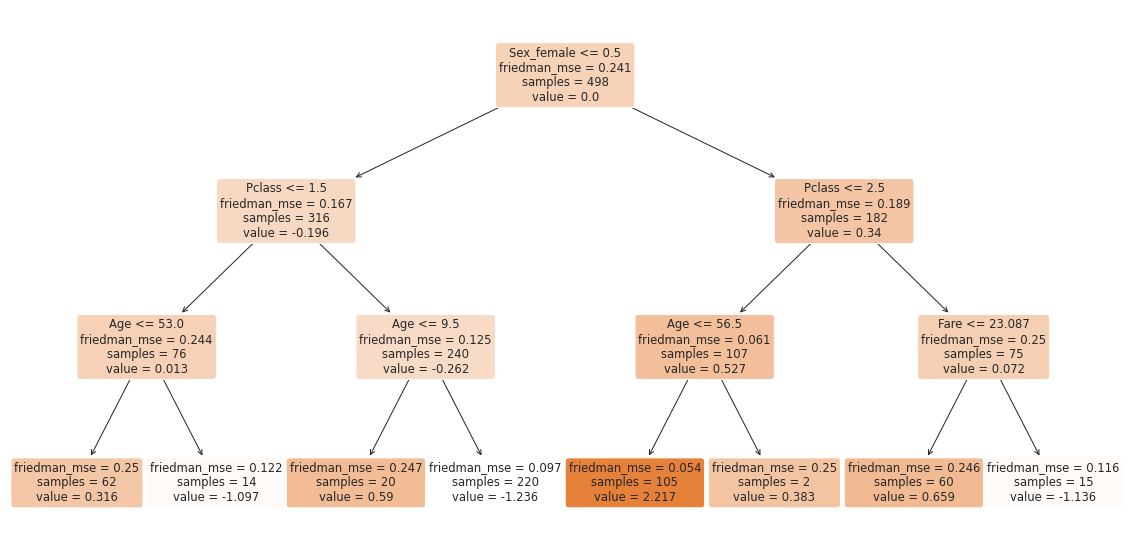

In [107]:
fig = plt.figure(figsize=(20,10))
tree.plot_tree(model[0][0],feature_names=X_train.columns,filled=True,rounded=True)


[Text(0.5, 0.875, 'Sex_male <= 0.5\nfriedman_mse = 0.221\nsamples = 498\nvalue = -0.0'),
 Text(0.25, 0.625, 'Pclass <= 2.5\nfriedman_mse = 0.176\nsamples = 182\nvalue = 0.305'),
 Text(0.125, 0.375, 'Age <= 3.0\nfriedman_mse = 0.06\nsamples = 107\nvalue = 0.473'),
 Text(0.0625, 0.125, 'friedman_mse = 0.25\nsamples = 2\nvalue = 0.153'),
 Text(0.1875, 0.125, 'friedman_mse = 0.053\nsamples = 105\nvalue = 1.939'),
 Text(0.375, 0.375, 'Fare <= 23.087\nfriedman_mse = 0.244\nsamples = 75\nvalue = 0.065'),
 Text(0.3125, 0.125, 'friedman_mse = 0.246\nsamples = 60\nvalue = 0.586'),
 Text(0.4375, 0.125, 'friedman_mse = 0.116\nsamples = 15\nvalue = -1.049'),
 Text(0.75, 0.625, 'Pclass <= 1.5\nfriedman_mse = 0.162\nsamples = 316\nvalue = -0.176'),
 Text(0.625, 0.375, 'Fare <= 26.144\nfriedman_mse = 0.24\nsamples = 76\nvalue = 0.012'),
 Text(0.5625, 0.125, 'friedman_mse = 0.0\nsamples = 6\nvalue = -1.695'),
 Text(0.6875, 0.125, 'friedman_mse = 0.245\nsamples = 70\nvalue = 0.199'),
 Text(0.875, 0.375,

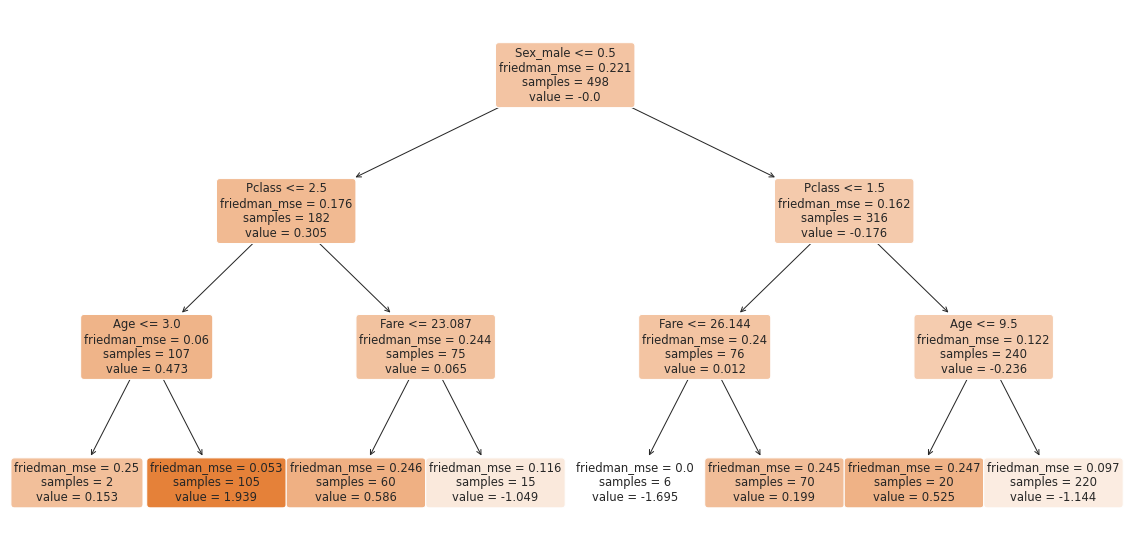

In [108]:
fig = plt.figure(figsize=(20,10))
tree.plot_tree(model[1][0],feature_names= X_train.columns,filled=True,rounded=True)

[Text(0.5, 0.875, 'Sex_female <= 0.5\nfriedman_mse = 0.204\nsamples = 498\nvalue = -0.001'),
 Text(0.25, 0.625, 'Pclass <= 1.5\nfriedman_mse = 0.157\nsamples = 316\nvalue = -0.159'),
 Text(0.125, 0.375, 'Age <= 53.0\nfriedman_mse = 0.238\nsamples = 76\nvalue = 0.011'),
 Text(0.0625, 0.125, 'friedman_mse = 0.246\nsamples = 62\nvalue = 0.278'),
 Text(0.1875, 0.125, 'friedman_mse = 0.122\nsamples = 14\nvalue = -1.017'),
 Text(0.375, 0.375, 'Age <= 9.5\nfriedman_mse = 0.119\nsamples = 240\nvalue = -0.213'),
 Text(0.3125, 0.125, 'friedman_mse = 0.247\nsamples = 20\nvalue = 0.469'),
 Text(0.4375, 0.125, 'friedman_mse = 0.097\nsamples = 220\nvalue = -1.064'),
 Text(0.75, 0.625, 'Pclass <= 2.5\nfriedman_mse = 0.166\nsamples = 182\nvalue = 0.274'),
 Text(0.625, 0.375, 'Age <= 3.0\nfriedman_mse = 0.06\nsamples = 107\nvalue = 0.426'),
 Text(0.5625, 0.125, 'friedman_mse = 0.25\nsamples = 2\nvalue = 0.137'),
 Text(0.6875, 0.125, 'friedman_mse = 0.053\nsamples = 105\nvalue = 1.734'),
 Text(0.875, 0.

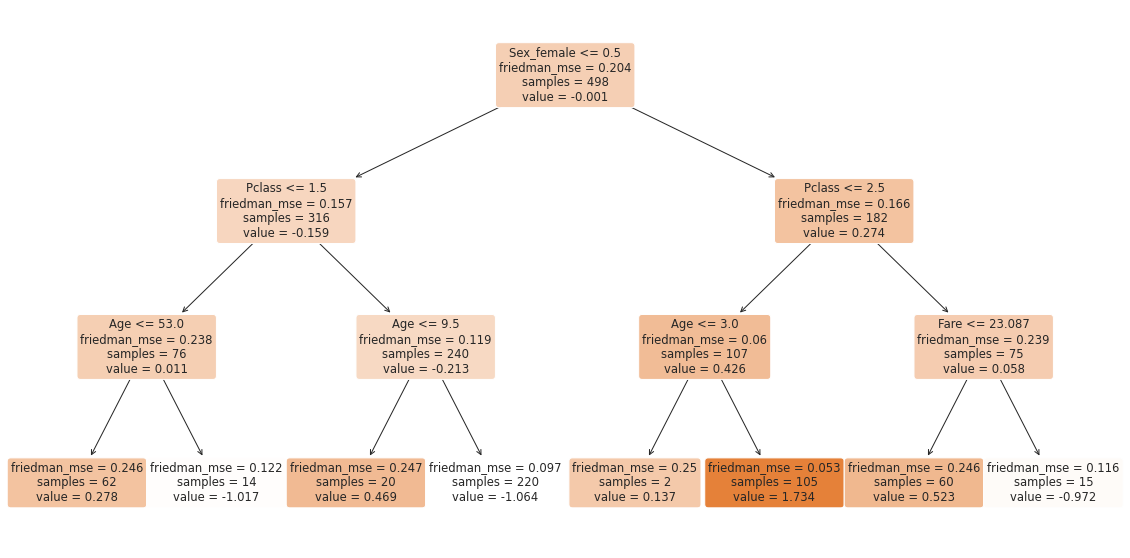

In [109]:
fig = plt.figure(figsize=(20,10))
tree.plot_tree(model[2][0],feature_names=X_train.columns,filled=True,rounded=True)

## Вычислим важность признаков

In [79]:
px.histogram(x=X_train.columns,y=model.feature_importances_,color=X_train.columns).update_xaxes(categoryorder='total descending')


In [117]:
test_scores,train_scores = [],[]
for iterations in range(1,50,1):
    model = GradientBoostingClassifier(n_estimators=iterations,verbose=False,random_state=RANDOM_SEED)
    cv = cross_validate(model,X,y,cv=10,return_train_score=True)
    score_train = cv['train_score'].mean()
    score_test = cv['test_score'].mean()

    test_scores.append(score_test)
    train_scores.append(score_train)



In [118]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x = np.arange(1,50,1),y = test_scores,name='СV'))
fig.add_trace(go.Scatter(x = np.arange(1,50,1),y = train_scores,name = 'Train'))

fig.update_layout(
    xaxis_title='Количество деревьев',
    yaxis_title='Точность',
    width=700, height=500
)

## Метод Случайного леса

In [119]:
rf_clf = RandomForestClassifier(random_state=RANDOM_SEED).fit(X_train,y_train)
px.histogram(x=X_train.columns,y=rf_clf.feature_importances_,color=X_train.columns).update_xaxes(categoryorder='total descending')

In [120]:
test_scores,train_scores = [],[]
for iterations in range(1,20,1):
    model = RandomForestClassifier(n_estimators=iterations,
    random_state=RANDOM_SEED,
    verbose=False,
    )
    
    cv = cross_validate(model,X,y,cv=10,return_train_score=True)
    score_train = cv['train_score'].mean()
    score_test = cv['test_score'].mean()

    test_scores.append(score_test)
    train_scores.append(score_train)


In [121]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x = np.arange(1,20,1),y = test_scores,name='test'))
fig.add_trace(go.Scatter(x = np.arange(1,20,1),y = train_scores,name = 'train'))

fig.update_layout(
    xaxis_title='Колличество деревьев',
    yaxis_title='Точность',
    width=700, height=500
)